## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_study_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_ID=mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989"]

dup_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
after_del_dup=mouse_study_data[mouse_study_data['Mouse ID'].isin(dup_ID)==False]

after_del_dup.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
after_del_dup["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe 
tumor_mean_regimen=after_del_dup.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median_regimen=after_del_dup.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance_regimen=after_del_dup.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_standev_regimen=after_del_dup.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem_regimen=after_del_dup.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_df=pd.DataFrame({
    "Mean": tumor_mean_regimen,
    "Median":tumor_median_regimen,
    "Variance":tumor_variance_regimen,
    "Standard Deviation":tumor_standev_regimen,
    "SEM":tumor_sem_regimen
})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean_regimen=after_del_dup.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median_regimen=after_del_dup.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance_regimen=after_del_dup.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_standev_regimen=after_del_dup.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem_regimen=after_del_dup.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_df=pd.DataFrame({
    "Mean": tumor_mean_regimen,
    "Median":tumor_median_regimen,
    "Variance":tumor_variance_regimen,
    "Standard Deviation":tumor_standev_regimen,
    "SEM":tumor_sem_regimen
})
summary_df
# Using the aggregation method, produce the same summary statistics in a single line
summary_df.agg

<bound method DataFrame.aggregate of                    Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398>

## Bar and Pie Charts

<AxesSubplot:title={'center':'Measurements Taken Per Drug'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

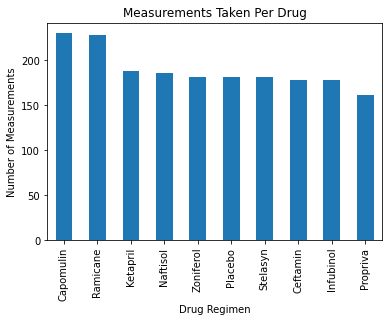

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Drug_Regimen=after_del_dup["Drug Regimen"].value_counts()
plt.title("Measurements Taken Per Drug")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")

Drug_Regimen.plot(kind="bar")

<BarContainer object of 10 artists>

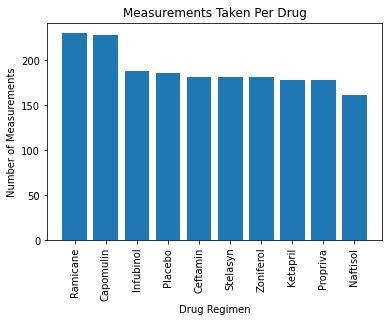

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Measurements=after_del_dup["Drug Regimen"].value_counts()
Drug=after_del_dup["Drug Regimen"].unique()
plt.title("Measurements Taken Per Drug")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.bar(Drug, Measurements)


<AxesSubplot:ylabel='Sex'>

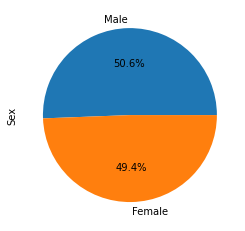

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Measurements=after_del_dup["Sex"].value_counts()
Measurements.plot(kind="pie", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x17f5f70cc18>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

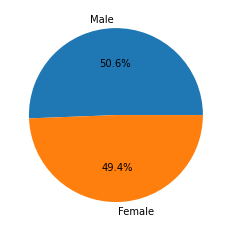

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
plt.pie(Measurements,  labels=labels, autopct="%1.1f%%" )

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin=after_del_dup.loc[after_del_dup["Drug Regimen"] == "Capomulin"]
capomulin_final=capomulin["Tumor Volume (mm3)"]
Ramicane=after_del_dup.loc[after_del_dup["Drug Regimen"] == "Ramicane"]
Ramicane_final=Ramicane["Tumor Volume (mm3)"]
infubinol=after_del_dup.loc[after_del_dup["Drug Regimen"] == "Infubinol"]
infubinol_final=infubinol["Tumor Volume (mm3)"]
ceftamin=after_del_dup.loc[after_del_dup["Drug Regimen"] == "Ceftamin"]
ceftamin_final=ceftamin["Tumor Volume (mm3)"]


# Start by getting the last (greatest) timepoint for each mouse
per_mouse=after_del_dup.groupby("Mouse ID")
last_timepoint=per_mouse["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_group = pd.merge(last_timepoint, after_del_dup)
merge_group.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [58]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = capomulin_final.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = capomulin_final.loc[(capomulin_final < lower_bound) | (capomulin_final > upper_bound)]
outlier_volume
    

The lower quartile of volume is: 37.685932865
The upper quartile of volume is: 45.0
The interquartile range of volume is: 7.314067135000002
The the median of volume is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

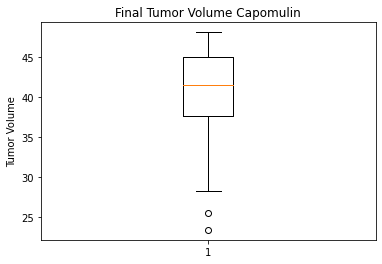

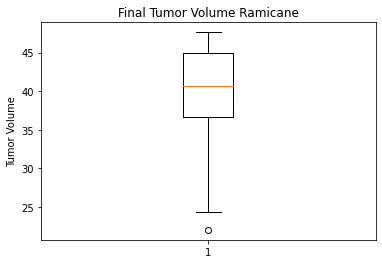

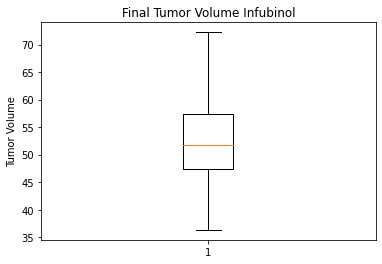

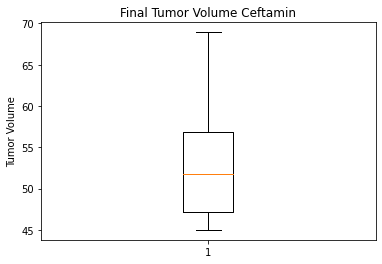

In [69]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

ax1.set_title("Final Tumor Volume Capomulin")
ax1.set_ylabel('Tumor Volume')
ax2.set_title("Final Tumor Volume Ramicane")
ax2.set_ylabel('Tumor Volume')
ax3.set_title("Final Tumor Volume Infubinol")
ax3.set_ylabel('Tumor Volume')
ax4.set_title("Final Tumor Volume Ceftamin")
ax4.set_ylabel('Tumor Volume')

ax1.boxplot(capomulin_final)
ax2.boxplot(Ramicane_final)
ax3.boxplot(infubinol_final)
ax4.boxplot(ceftamin_final)

plt.show()

## Line and Scatter Plots

<AxesSubplot:>

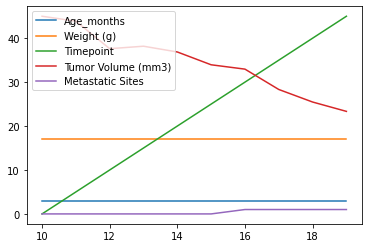

In [48]:
subject=after_del_dup.loc[after_del_dup["Mouse ID"] == "s185"]
subject.plot.line()

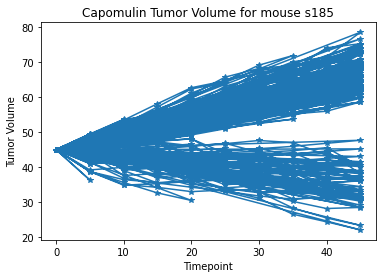

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
subject=after_del_dup.loc[after_del_dup["Mouse ID"] == "s185"]
y_value=after_del_dup["Tumor Volume (mm3)"]
x_value=after_del_dup["Timepoint"]     
plt.plot(x_value, y_value, marker="*")
plt.title("Capomulin Tumor Volume for mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show() 

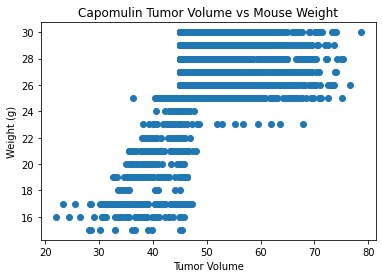

In [57]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
reg_cap=after_del_dup.loc[after_del_dup["Drug Regimen"] == "Capomulin"]
mean_tum_vol=reg_cap.groupby("Tumor Volume (mm3)").mean()
y_value=after_del_dup["Weight (g)"]
x_value=after_del_dup["Tumor Volume (mm3)"]                              
plt.scatter(x_value, y_value)
plt.title("Capomulin Tumor Volume vs Mouse Weight")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight (g)")
plt.show()                              
                             

## Correlation and Regression

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between average tumor volume and Capomulin is {round(capomulin_final("Weight (g)")}")

SyntaxError: invalid syntax (<ipython-input-73-78b38699fe3b>, line 3)